<a href="https://colab.research.google.com/github/mgarbanzo/PercepcionRemota/blob/main/PRI_Pr%C3%A1ctica_en_clase_Convoluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

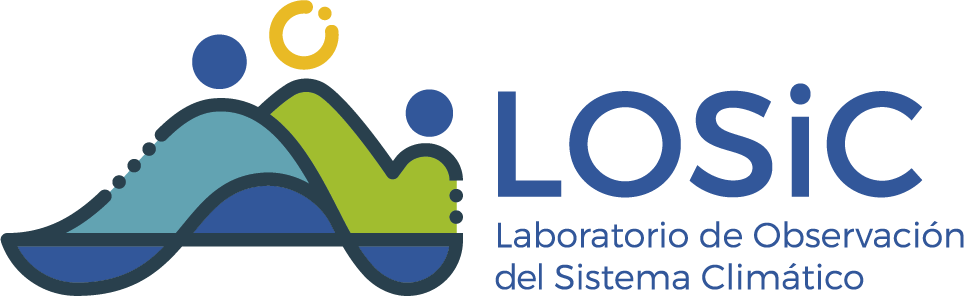

Curso: Percepción Remota I

Profesor: Marcial Garbanzo Salas

Semestre: II-2021


# Práctica de convolución
Enunciado:


In [ ]:
import numpy as np
import pylab as plt
from scipy.constants import c
from scipy import signal

In [53]:
Rmax = 6000
tmax = Rmax/c
Smax = 400
smax = Smax/c

In [54]:
tmax, smax

(2.0013845711889123e-05, 1.3342563807926082e-06)

In [71]:
dt = 1E-9

## Generar la señal

In [72]:
ts = np.arange(0,smax,dt)

In [73]:
fo = 40E6
w = 2 * np.pi * fo

In [74]:
Sx = np.sin(w*(ts-smax/2))/(w*(ts-smax/2))
W = np.hamming(len(ts)) # Esta es la ventana que vamos a utilizar
signal = Sx*W

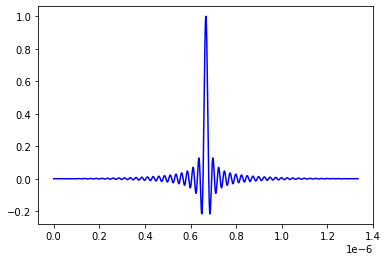

In [75]:
plt.figure()
plt.plot(ts, signal, '-b')

## Generar el entorno

In [76]:
t = np.arange(0,tmax,dt)

In [80]:
S = np.zeros_like(t)

In [81]:
S[t<=smax] = signal

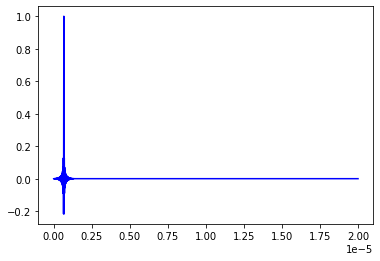

In [82]:
plt.figure()
plt.plot(t, S, '-b')

In [126]:
N = 10
ubicaciones= np.random.randint(0,len(t),size=N)

In [127]:
entorno = np.zeros_like(t)
entorno[ubicaciones] = 1

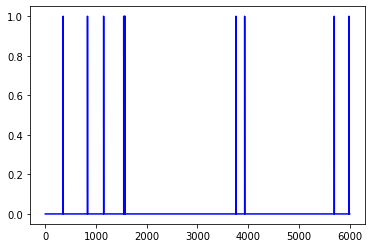

In [128]:
plt.figure()
plt.plot(c*t, entorno, '-b')

# Calculando la convolución con numpy

In [144]:
resultado = np.convolve(S,entorno, mode='full')

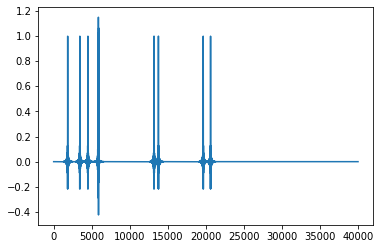

In [145]:
plt.figure()
plt.plot(resultado)

# Calculando la convolución espectralmente

In [131]:
FTS = np.fft.fft(S)
FTE = np.fft.fft(entorno)
XFT = np.fft.fftfreq(len(FTS),d=dt)

In [132]:
FTS

array([12.50119208+8.88178420e-16j, 12.22798558-2.59914268e+00j,
       11.42031339-5.08465875e+00j, ..., 10.11349405+7.34789325e+00j,
       11.42031339+5.08465875e+00j, 12.22798558+2.59914268e+00j])

# Visualizando espectros

Primero graficamos los valores.

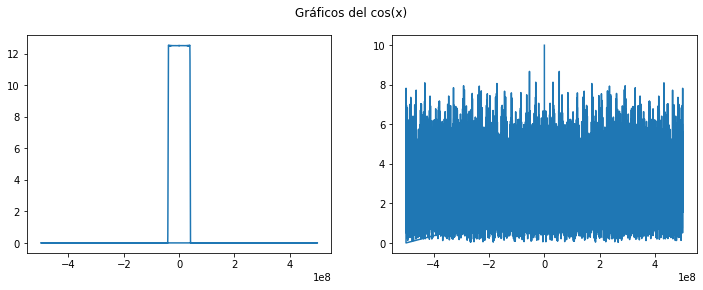

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Gráficos del cos(x)')
ax1.plot(XFT,np.abs(FTS))
ax2.plot(XFT,np.abs(FTE))

## Calculamos la convolución en Frecuencia

In [134]:
C = FTS * FTE

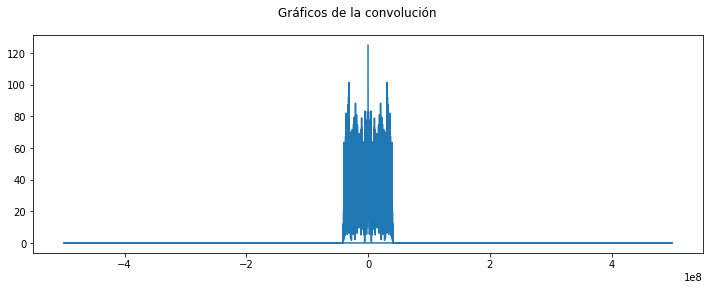

In [135]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,4))
fig.suptitle('Gráficos de la convolución')
ax1.plot(XFT,np.abs(C))
#plt.xlim((-1,1))

In [149]:
iFTC = np.fft.ifft(C)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


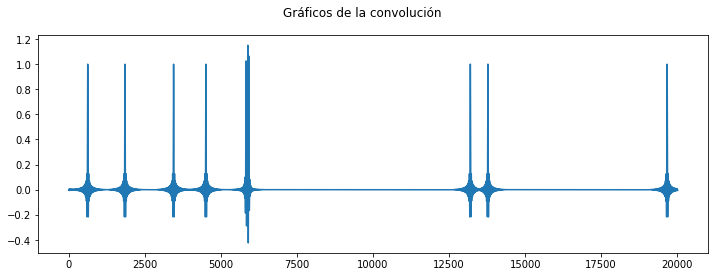

In [151]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12,4))
fig.suptitle('Gráficos de la convolución')
ax1.plot(iFTC)